# Machine Intelligence II (week 2) -- Team MensaNord

- Nikolai Zaki
- Alexander Moore
- Johannes Rieke
- Georg Hoelger
- Oliver Atanaszov

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pandas.tools.plotting import scatter_matrix
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

## Exercise 1 A

In [2]:
data = np.loadtxt('pca-data-2d.dat', delimiter=' ', skiprows=0, usecols=range(0, 2))
data.shape

(10, 2)

In [3]:
data

array([[ 2.4, -2.5],
       [ 0.7, -0.5],
       [ 2.9, -2.2],
       [ 2.2, -1.9],
       [ 3. , -3.1],
       [ 2.7, -2.3],
       [ 1.6, -2. ],
       [ 1.1, -1. ],
       [ 1.6, -1.5],
       [ 0.9, -1.1]])

In [4]:
m = np.mean(data, 0)
m

array([ 1.91, -1.81])

In [5]:
data_centered = np.subtract(data, m)
data_centered

array([[ 0.49, -0.69],
       [-1.21,  1.31],
       [ 0.99, -0.39],
       [ 0.29, -0.09],
       [ 1.09, -1.29],
       [ 0.79, -0.49],
       [-0.31, -0.19],
       [-0.81,  0.81],
       [-0.31,  0.31],
       [-1.01,  0.71]])

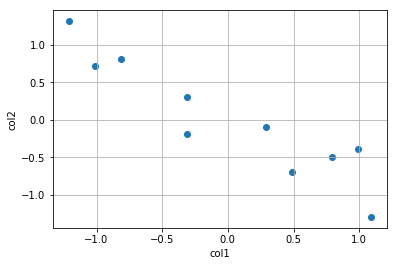

In [6]:
plt.figure()
plt.scatter(data_centered.T[0], data_centered.T[1])
plt.xlabel("col1")
plt.ylabel("col2")
plt.grid()
plt.show()

## Exercise 1 B

In [7]:
covariance = np.cov(data_centered.T)
covariance

array([[ 0.71655556, -0.61544444],
       [-0.61544444,  0.61655556]])

In [8]:
evals, evecs = np.linalg.eig(covariance)
transmat = evecs.T
transmat

array([[ 0.73517866, -0.6778734 ],
       [ 0.6778734 ,  0.73517866]])

In [9]:
evec1 = transmat[0] #evecs[:, 0]
evec2 = transmat[1] #evecs[:, 1]
evec1

array([ 0.73517866, -0.6778734 ])

In [10]:
data_trans = np.array([[0.0, 0.0] for i in range(len(data))])
for i in range(len(data_centered)):
    data_trans[i] = np.dot(transmat, data_centered[i])
data_trans

array([[ 0.82797019, -0.17511531],
       [-1.77758033,  0.14285723],
       [ 0.99219749,  0.38437499],
       [ 0.27421042,  0.13041721],
       [ 1.67580142, -0.20949846],
       [ 0.9129491 ,  0.17528244],
       [-0.09910944, -0.3498247 ],
       [-1.14457216,  0.04641726],
       [-0.43804614,  0.01776463],
       [-1.22382056, -0.16267529]])

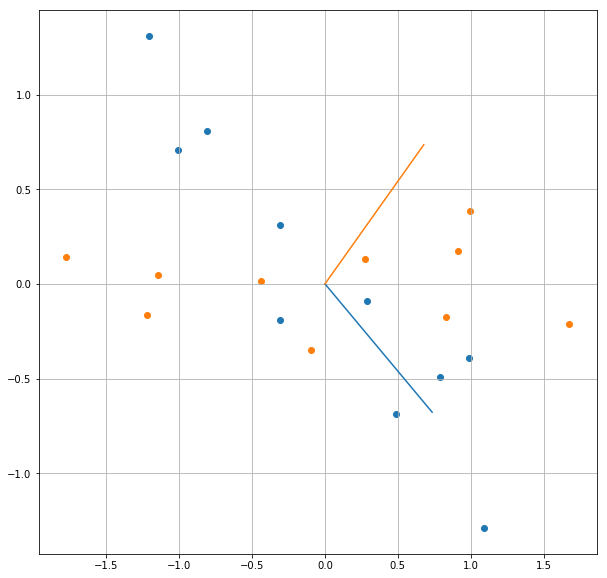

In [11]:
plt.figure(figsize=(10, 10))
plt.scatter(data_centered.T[0], data_centered.T[1])
plt.plot([0, evec1[0]], [0, evec1[1]])
plt.plot([0, evec2[0]], [0, evec2[1]])
plt.scatter(data_trans.T[0], data_trans.T[1])
plt.grid()
plt.show()

## Exercise 1 C

In [12]:
transmat_inv = np.linalg.inv(transmat)

data_trans_inv = np.array([[0.0, 0.0] for i in range(len(data))])
for i in range(len(data)):
    data_trans_inv[i] = np.dot(transmat_inv, data_trans[i])
data_trans_inv

data_trans_PC1 = np.copy(data_trans)
data_trans_PC1[:, 1] = 0
data_trans_inv_PC1 = np.array([[0.0, 0.0] for i in range(len(data))])
for i in range(len(data)):
    data_trans_inv_PC1[i] = np.dot(transmat_inv, data_trans_PC1[i])

data_trans_PC2 = np.copy(data_trans)
data_trans_PC2[:, 0] = 0
data_trans_inv_PC2 = np.array([[0.0, 0.0] for i in range(len(data))])
for i in range(len(data)):
    data_trans_inv_PC2[i] = np.dot(transmat_inv, data_trans_PC2[i])
data_trans_PC2

array([[ 0.        , -0.17511531],
       [ 0.        ,  0.14285723],
       [ 0.        ,  0.38437499],
       [ 0.        ,  0.13041721],
       [ 0.        , -0.20949846],
       [ 0.        ,  0.17528244],
       [ 0.        , -0.3498247 ],
       [ 0.        ,  0.04641726],
       [ 0.        ,  0.01776463],
       [ 0.        , -0.16267529]])

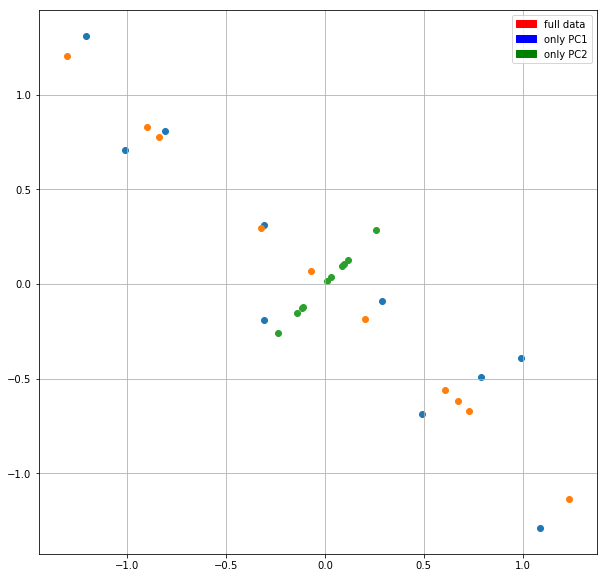

In [13]:
plt.figure(figsize=(10, 10))
plt.scatter(data_centered.T[0], data_centered.T[1])
plt.scatter(data_trans_inv_PC1.T[0], data_trans_inv_PC1.T[1])
plt.scatter(data_trans_inv_PC2.T[0], data_trans_inv_PC2.T[1])

red_patch = mpatches.Patch(color='red', label='full data')
blue_patch = mpatches.Patch(color='blue', label='only PC1')
green_patch = mpatches.Patch(color='green', label='only PC2')
plt.legend(handles=[red_patch, blue_patch, green_patch])
plt.grid()
plt.show()

## Exercise 2 A

In [14]:
data3d = np.loadtxt('pca-data-3d.txt', delimiter=',', skiprows=1)
data3d.shape # 3 axis 500 points

(500, 3)

In [15]:
mean3d = np.mean(data3d, 0)
data3d_centered = np.subtract(data3d, mean3d)
mean3d

array([ 0.04355465,  0.09190794, -0.0594604 ])

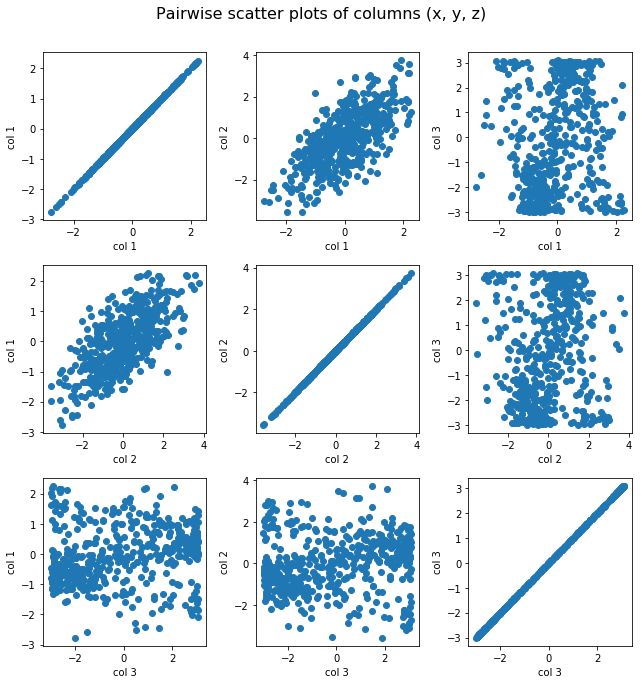

In [18]:
fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i in range(3):
    for j in range(3):
        axs[i][j].scatter(data3d_centered[:, i], data3d_centered[:, j])
        plt.tight_layout(1)
        axs[i][j].set_xlabel('col {}'.format(i+1))
        axs[i][j].set_ylabel('col {}'.format(j+1))
fig.suptitle('Pairwise scatter plots of columns (x, y, z)', y=1.05, fontsize=16)
plt.show()

## Exercise 2 B

In [19]:
covariance3d = np.cov(data3d_centered.T)
evals3d, evecs3d = np.linalg.eig(covariance3d)
transmat3d = evecs3d.T

covariance3d
transmat3d
evals3d
# => Z is PC1 // Y is PC2 // X is PC3

array([ 0.38503192,  2.24956199,  4.4947884 ])

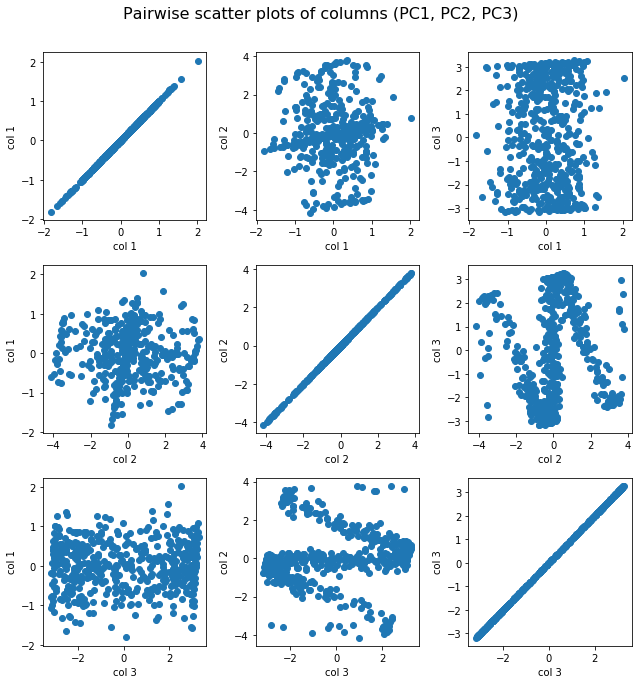

In [22]:
data3d_trans = np.array([[0.0, 0.0, 0.0] for i in range(len(data3d))])
for i in range(len(data3d_centered)):
    data3d_trans[i] = np.dot(transmat3d, data3d_centered[i])

fig, axs = plt.subplots(3, 3, figsize=(9, 9))
for i in range(3):
    for j in range(3):
        axs[i][j].scatter(data3d_trans[:, i], data3d_trans[:, j])
        plt.tight_layout(1)
        axs[i][j].set_xlabel('col {}'.format(i+1))
        axs[i][j].set_ylabel('col {}'.format(j+1))
fig.suptitle('Pairwise scatter plots of columns (PC1, PC2, PC3)', y=1.05, fontsize=16)
plt.show()

## Exercise 2 C

In [23]:
transmat3d_inv = np.linalg.inv(transmat3d)

data3d_trans_PC1 = np.copy(data3d_trans)
data3d_trans_PC1[:, 0] = 0
data3d_trans_PC1[:, 1] = 0
data3d_trans_PC1_recov = np.array([[0.0, 0.0, 0.0] for i in range(len(data3d))])
for i in range(len(data3d)):
    data3d_trans_PC1_recov[i] = np.dot(transmat3d_inv, data3d_trans_PC1[i])

data3d_trans_PC12 = np.copy(data3d_trans)
data3d_trans_PC12[:, 0] = 0
data3d_trans_PC12_recov = np.array([[0.0, 0.0, 0.0] for i in range(len(data3d))])
for i in range(len(data3d)):
    data3d_trans_PC12_recov[i] = np.dot(transmat3d_inv, data3d_trans_PC12[i])

data3d_trans_PC123_recov = np.array([[0.0, 0.0, 0.0] for i in range(len(data3d))])
for i in range(len(data3d)):
    data3d_trans_PC123_recov[i] = np.dot(transmat3d_inv, data3d_trans[i])

data3d_trans_PC12[0, :]

array([ 0.        ,  0.02122219, -0.15247264])

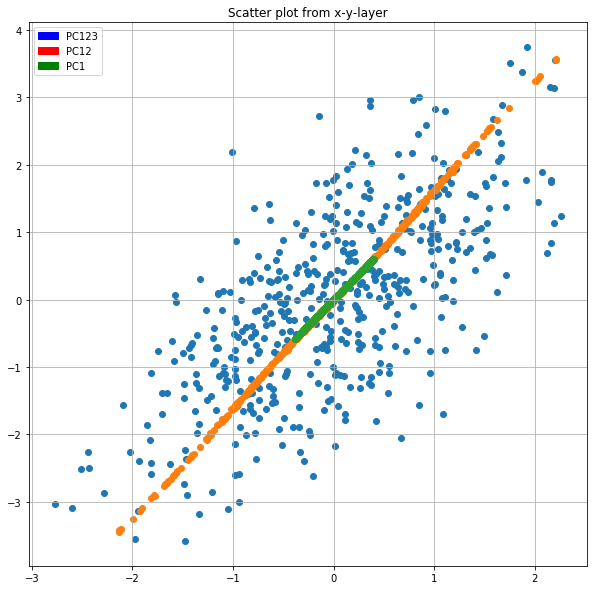

In [24]:
plt.figure(figsize=(10, 10))
plt.scatter(data3d_trans_PC123_recov.T[0], data3d_trans_PC123_recov.T[1])
plt.scatter(data3d_trans_PC12_recov.T[0], data3d_trans_PC12_recov.T[1])
plt.scatter(data3d_trans_PC1_recov.T[0], data3d_trans_PC1_recov.T[1])

blue_patch = mpatches.Patch(color='blue', label='PC123')
red_patch = mpatches.Patch(color='red', label='PC12')
green_patch = mpatches.Patch(color='green', label='PC1')
plt.legend(handles=[blue_patch, red_patch, green_patch])
plt.title('Scatter plot from x-y-layer')
plt.grid()
plt.show()

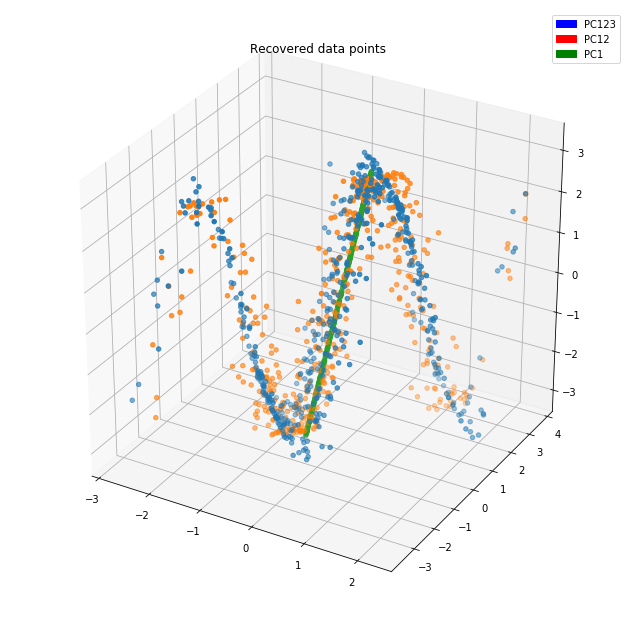

In [25]:
fig = plt.figure(figsize=(11, 11))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data3d_trans_PC123_recov[:, 0], data3d_trans_PC123_recov[:, 1], data3d_trans_PC123_recov[:, 2])
ax.scatter(data3d_trans_PC12_recov[:, 0], data3d_trans_PC12_recov[:, 1], data3d_trans_PC12_recov[:, 2])
ax.scatter(data3d_trans_PC1_recov[:, 0], data3d_trans_PC1_recov[:, 1], data3d_trans_PC1_recov[:, 2])

blue_patch = mpatches.Patch(color='blue', label='PC123')
red_patch = mpatches.Patch(color='red', label='PC12')
green_patch = mpatches.Patch(color='green', label='PC1')
plt.legend(handles=[blue_patch, red_patch, green_patch])
plt.title('Recovered data points')
plt.show()

Using only the first PC is too little information to near or compress the data. Using the first two PCs similars the original data quite well.

## Exercise 3 A

In [26]:
data = np.loadtxt('expDat.txt', delimiter=',', skiprows=1, usecols=range(1, 21))
data.shape, data

((100, 20), array([[ 1.,  0.,  0., ...,  4.,  2.,  1.],
        [ 2.,  2.,  2., ...,  1.,  1.,  2.],
        [ 3.,  2.,  3., ...,  1.,  1.,  3.],
        ..., 
        [ 1.,  3.,  2., ...,  3.,  2.,  1.],
        [ 2.,  1.,  3., ...,  2.,  2.,  5.],
        [ 2.,  2.,  3., ...,  0.,  3.,  1.]]))

In [28]:
data_centered = data - data.mean(axis=0)
data_centered

array([[-3.81, -4.84, -5.36, ..., -0.88, -3.17, -4.08],
       [-2.81, -2.84, -3.36, ..., -3.88, -4.17, -3.08],
       [-1.81, -2.84, -2.36, ..., -3.88, -4.17, -2.08],
       ..., 
       [-3.81, -1.84, -3.36, ..., -1.88, -3.17, -4.08],
       [-2.81, -3.84, -2.36, ..., -2.88, -3.17, -0.08],
       [-2.81, -2.84, -2.36, ..., -4.88, -2.17, -4.08]])

In [30]:
covariance = np.cov(data_centered.T)
covariance.shape

(20, 20)

In [41]:
evals, evecs = np.linalg.eig(covariance)
evecs.T

array([[ 0.23170068,  0.20360727,  0.25007147,  0.23686223,  0.24044926,
         0.20440472,  0.24056995,  0.24586141,  0.17737701,  0.19751861,
         0.23351045,  0.25924694,  0.20479872,  0.20921262,  0.21936356,
         0.1823281 ,  0.22130098,  0.21830107,  0.25554948,  0.21697206],
       [-0.21830578, -0.19920182, -0.22656499,  0.25687137,  0.15817077,
         0.22088493, -0.19487112, -0.16185434,  0.22633286, -0.12746   ,
        -0.2675393 , -0.17544956,  0.25260932,  0.25479589,  0.24699672,
         0.24628233,  0.21538704,  0.24338423, -0.2849078 , -0.22436526],
       [ 0.10440694,  0.22953607,  0.37448821,  0.02510211,  0.24055312,
         0.17227829, -0.10386734, -0.16363664,  0.28136859, -0.00336538,
        -0.415635  , -0.1614494 , -0.06128927,  0.07689358, -0.22606157,
        -0.23820208,  0.06543737, -0.23680816,  0.33872626, -0.31594809],
       [ 0.12313067, -0.31129876, -0.06571507,  0.17449749, -0.45952533,
        -0.02449325, -0.18318469, -0.08022182,  

## Exercise 3 B

## Exercise 4 A

In [92]:
from scipy.ndimage import imread
import os

In [95]:
n_patches = []
b_patches = []
for img_name in os.listdir('imgpca'):
    img = imread(os.path.join('imgpca', img_name))
    for i in range(500):
        x = np.random.randint(img.shape[0] - 16)
        y = np.random.randint(img.shape[1] - 16)
        patch = img[x:x+16, y:y+16].flatten()
        if img_name.startswith('n'):
            n_patches.append(patch)
        elif img_name.startswith('b'):
            b_patches.append(patch)
        
n_patches = np.array(n_patches)
b_patches = np.array(b_patches)

n_patches.shape, b_patches.shape

((6500, 256), (7000, 256))

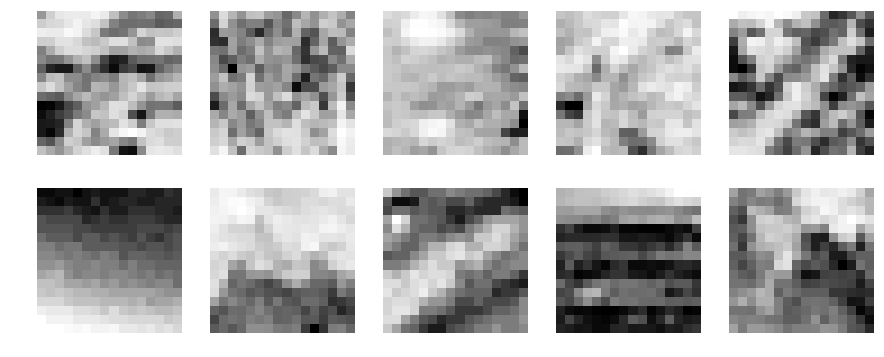

In [96]:
# Show some nature patches.
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax in axes.flatten():
    plt.sca(ax)
    plt.imshow(n_patches[np.random.randint(len(n_patches))].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.axis('off')

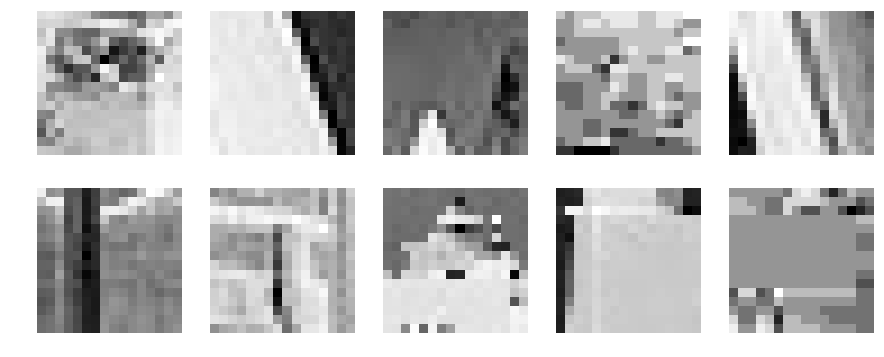

In [97]:
# Show some building patches.
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
for ax in axes.flatten():
    plt.sca(ax)
    plt.imshow(b_patches[np.random.randint(len(b_patches))].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.axis('off')

## Exercise 4 B

In [99]:
n_patches_centered = n_patches - n_patches.mean(axis=0)
b_patches_centered = b_patches - b_patches.mean(axis=0)

In [100]:
n_covariance = np.cov(n_patches_centered.T)
b_covariance = np.cov(b_patches_centered.T)
n_covariance.shape, b_covariance.shape

((256, 256), (256, 256))

In [101]:
n_evals, n_evecs = np.linalg.eig(n_covariance)
b_evals, b_evecs = np.linalg.eig(b_covariance)
n_evecs.T.shape, b_evecs.T.shape

((256, 256), (256, 256))

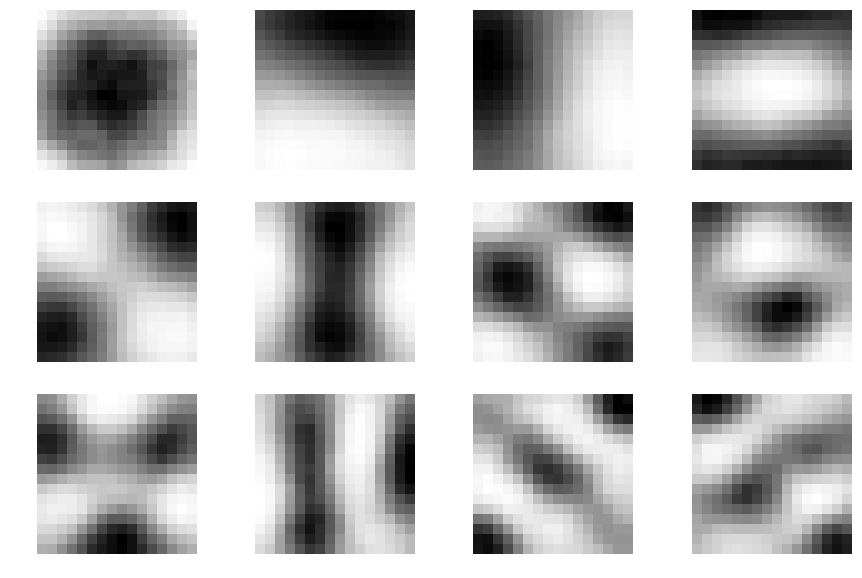

In [103]:
# Nature PCAs.
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.imshow(n_evecs.T[i].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.axis('off')

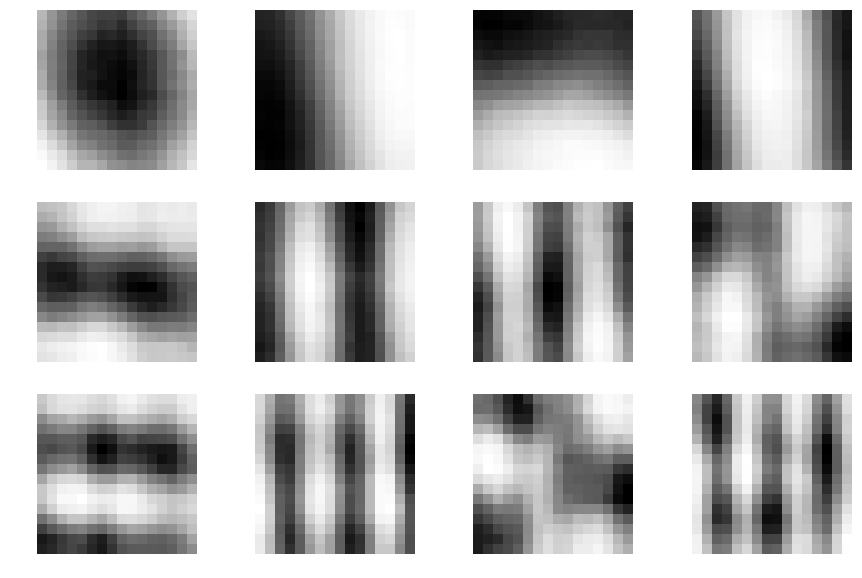

In [104]:
# Building PCAs.
fig, axes = plt.subplots(3, 4, figsize=(15, 10))
for i, ax in enumerate(axes.flatten()):
    plt.sca(ax)
    plt.imshow(b_evecs.T[i].reshape(16, 16), cmap='Greys', interpolation=None)
    plt.axis('off')

The first few PCAs from building and nature images are similar, they represent basic shades and edges (first rows in the plots above). However, the PCAs from the second and third rows above seem different - for buildings, the lines are edgy and straight, while for nature images, they seem to have more natural shapes.

## Exercise 4 C

(0, 80000)

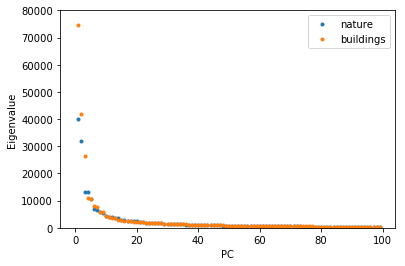

In [135]:
plt.plot(n_evals[:100], '.', label='nature')
plt.plot(b_evals[:100], '.', label='buildings')
plt.ylabel('Eigenvalue')
plt.xlabel('PC')
plt.legend()
plt.ylim(0, 80000)

For simplicity, only the first 100 PCs are plotted and the first PC is not shown due to its high eigenvalue. For both image categories, one should keep around 20 PCs according to the Scree test. This represents a compression of 1 - (20/256) = 92 %.